In [5]:
import numpy as np
import matplotlib.pyplot as plt
import json

## p=0.5

In [66]:
Navg = np.array([4.94444, 5.17582, 5.34482, 5.4758 , 5.58994, 5.687  , 5.77324,
       5.85024, 5.91932, 5.98312, 6.04258, 6.09692, 6.14604, 6.1911 ,
       6.23688, 6.2795 , 6.31864, 6.3578 , 6.39394])
Mavg = np.array([0.28795302, 0.27782184, 0.27093577, 0.26560948, 0.26131252,
       0.25772299, 0.25472872, 0.25208829, 0.24975449, 0.24773725,
       0.24584894, 0.24415717, 0.24255834, 0.24102139, 0.23964153,
       0.23835848, 0.23713529, 0.23598023, 0.23484956])

In [67]:
header = dict()
header['alpha'] = 3
header['probability'] = 0.5
header['ensemble_size']=50000
header['total_time_iteraion']=1000_000
header['cols'] = ["t", "N", "M"]

time_col = np.arange(100_000, 1000_000+50000, 50000)

header_str = json.dumps(header)
print(header_str)
filename = "fractal_dim_alpha_3_p_0_50"
np.savetxt(filename, np.c_[time_col, Navg, Mavg], header=header_str)

{"alpha": 3, "probability": 0.5, "ensemble_size": 50000, "total_time_iteraion": 1000000, "cols": ["t", "N", "M"]}


In [68]:
time_col = np.arange(100_000, 1000_000, 50000)

In [69]:
time_col

array([100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000,
       500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000,
       900000, 950000])

## p=0.75

In [70]:
Navg = np.array([ 9.69124, 10.33366, 10.81472, 11.20096, 11.5312 , 11.81356,
       12.0657 , 12.2907 , 12.49924, 12.6927 , 12.86864, 13.03368,
       13.18952, 13.3335 , 13.47006, 13.5955 , 13.71642, 13.83046,
       13.94208])
Mavg = np.array([0.55605986, 0.54655451, 0.53995522, 0.53490652, 0.5307424 ,
       0.52718614, 0.52419103, 0.52160572, 0.51931556, 0.51724067,
       0.51536885, 0.51358454, 0.51197059, 0.51047723, 0.50907874,
       0.50772832, 0.50651494, 0.50537126, 0.50430601])

In [71]:
header = dict()
header['alpha'] = 3
header['probability'] = 0.75
header['ensemble_size']=50000
header['total_time_iteraion']=1000_000
header['cols'] = ["t", "N", "M"]

time_col = np.arange(100_000, 1000_000+50000, 50000)

header_str = json.dumps(header)
print(header_str)
filename = "fractal_dim_alpha_3_p_0_75"
np.savetxt(filename, np.c_[time_col, Navg, Mavg], header=header_str)

{"alpha": 3, "probability": 0.75, "ensemble_size": 50000, "total_time_iteraion": 1000000, "cols": ["t", "N", "M"]}


## p=0.25

In [72]:
Navg = np.array([2.35434, 2.41252, 2.45346, 2.48548, 2.51204, 2.5361 , 2.55566,
       2.57338, 2.59024, 2.6052 , 2.61826, 2.63016, 2.64152, 2.65228,
       2.6622 , 2.67166, 2.6812 , 2.6894 , 2.69718])
Mavg = np.array([0.13937042, 0.13162017, 0.12636012, 0.12240809, 0.11917799,
       0.11655063, 0.11447047, 0.11260058, 0.11091158, 0.10945434,
       0.10812541, 0.10693599, 0.10583521, 0.10484376, 0.10391722,
       0.10306183, 0.10227415, 0.10149382, 0.10076547])

In [73]:
header = dict()
header['alpha'] = 3
header['probability'] = 0.25
header['ensemble_size']=50000
header['total_time_iteraion']=1000_000
header['cols'] = ["t", "N", "M"]

time_col = np.arange(100_000, 1000_000+50000, 50000)

header_str = json.dumps(header)
print(header_str)
filename = "fractal_dim_alpha_3_p_0_25"
np.savetxt(filename, np.c_[time_col, Navg, Mavg], header=header_str)

{"alpha": 3, "probability": 0.25, "ensemble_size": 50000, "total_time_iteraion": 1000000, "cols": ["t", "N", "M"]}


## Plotting

In [74]:
import glob
files = glob.glob("fractal_dim_*")

In [75]:
files

['fractal_dim_alpha_3_p_0_50',
 'fractal_dim_alpha_3_p_0_25',
 'fractal_dim_alpha_3_p_0_75']

In [76]:
def convert_to_plot(N1_average, M1_average):
    N1_log = np.log(N1_average)
    minus_delta1_log = N1_log - np.log(M1_average)
    slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
    return minus_delta1_log, N1_log, slope, intercept

Text(0, 0.5, '')

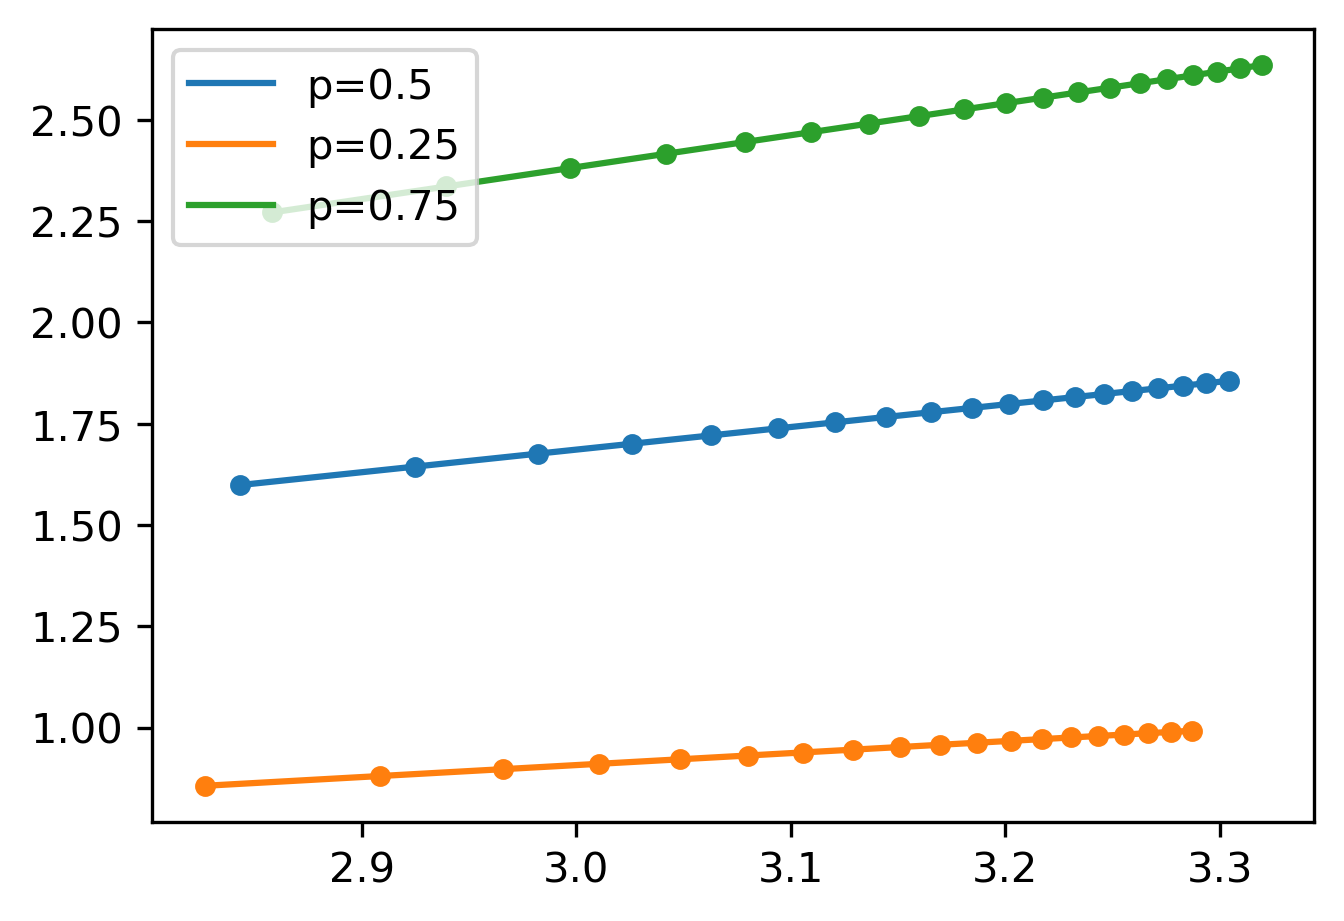

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
colors = ['tab:blue', 'tab:orange', 'tab:green']
i = 0
data_dct = dict()
for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        p = head['probability']
        pass
    data = np.loadtxt(file)
    data_dct[p] = data
    t, N, M = data.T
    x, y, slope, intercept = convert_to_plot(N, M)
    plt.plot(x, y, 'o', color=colors[i], markersize=4)
    plt.plot(x, x*slope + intercept, label="p={}".format(p),  color=colors[i])
    i += 1
    pass
plt.legend()
plt.xlabel("")
plt.ylabel("")

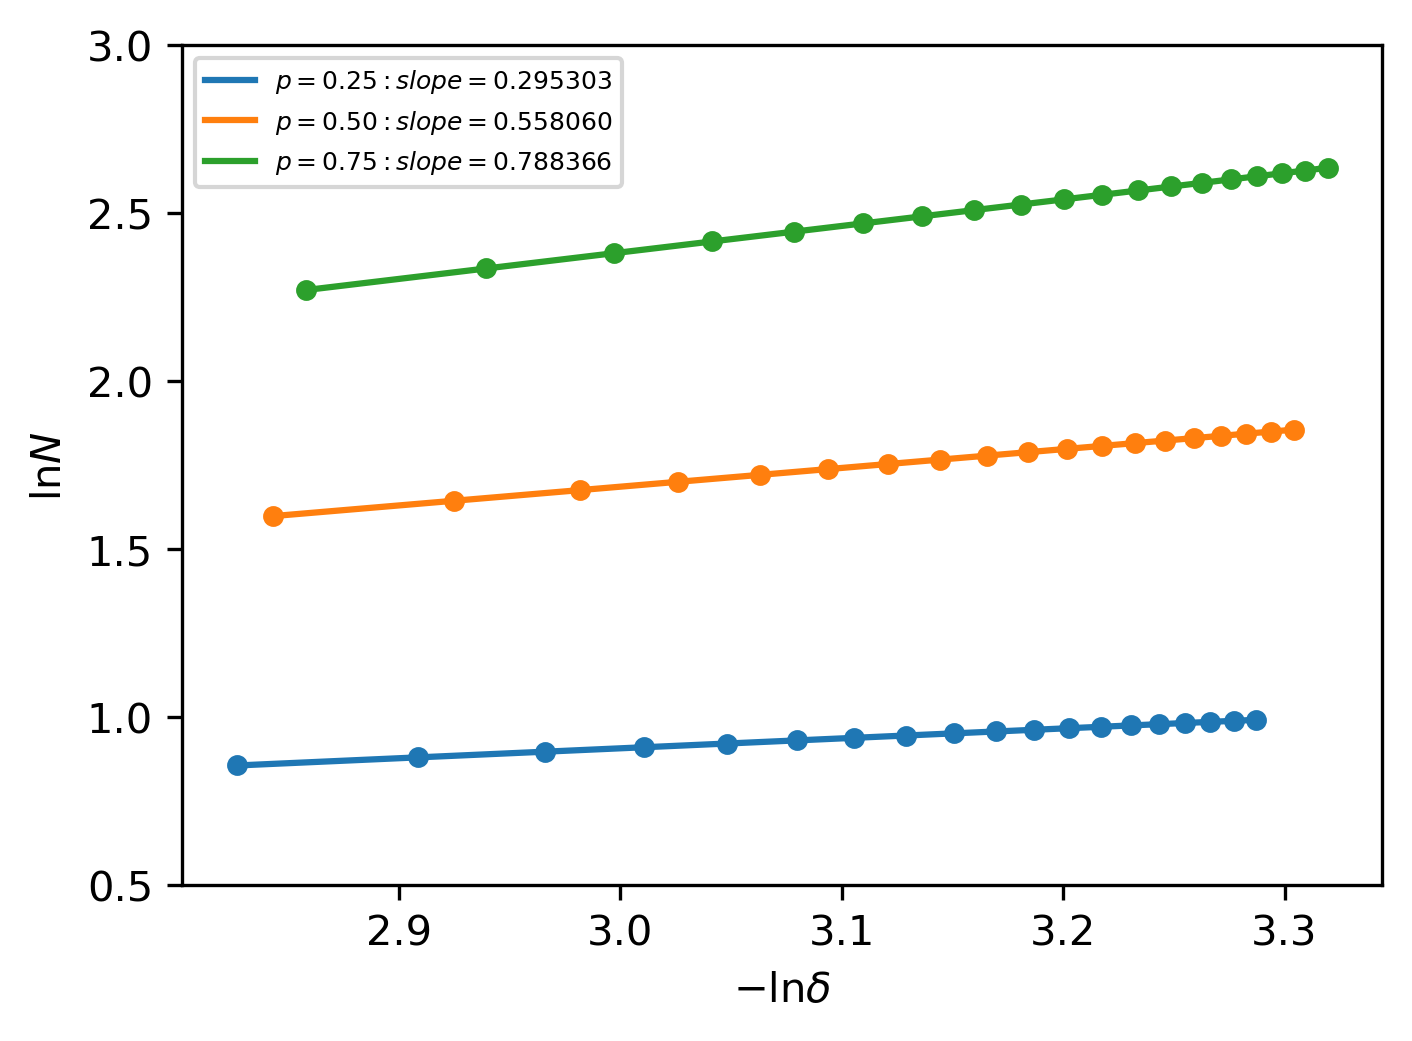

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
probabilities = [0.25, 0.5, 0.75]
i = 0
for p in probabilities:
    data = data_dct[p]
    t, N, M = data.T
    x, y, slope, intercept = convert_to_plot(N, M)
    plt.plot(x, y, 'o', color=colors[i], markersize=4)
    plt.plot(x, x*slope + intercept, label=r"$p={:.2f}: slope={:.6f}$".format(p, slope),  color=colors[i])
    i += 1
    pass
# plt.legend(loc='best', bbox_to_anchor=(0.5, 0.05, 0.5, 0.5))
plt.legend(fontsize=6, loc=2)
plt.xlabel(r"$-\ln \delta$")
plt.ylabel(r"$\ln N$")
plt.ylim([0.5, 3])
ax.set_position([0.15, 0.15, 0.8, 0.8])
plt.savefig("fractal_dim_alpha_3.pdf")